In [1]:
pip install plotly 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\kumar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np


In [3]:
df = pd.read_csv("Day 68 country.csv")
df.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [4]:
print(df.isnull().sum())
print(df.shape)
print(df.columns)
print(df.describe)

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64
(187, 15)
Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')
<bound method NDFrame.describe of          Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    

In [5]:
total_countries = df['Country/Region'].nunique()
print("total_countries:",total_countries)

total_countries: 187


In [6]:
total_confirmed = df['Confirmed'].sum()
print('total_countries:',total_countries)

total_countries: 187


In [7]:
total_death = df['Deaths'].sum()
print('total_death:',total_death)

total_death: 654036


In [8]:
total_recovered = df['Recovered'].sum()
[print('total_recovered:',total_recovered)]

total_recovered: 9468087


[None]

In [9]:
total_active = df['Active'].sum()
print('total_active:',total_active)

total_active: 6358362


In [10]:
gobal_recovery_rate = (total_recovered/total_confirmed)*100
print("gobal_recovery_rate:{:.2f}%".format(gobal_recovery_rate))

gobal_recovery_rate:57.45%


In [11]:
gobal_mortality_rate = (total_death/total_confirmed)*100
print('gobal_mortality_rate:{:.2f}%'.format(gobal_mortality_rate))

gobal_mortality_rate:3.97%


In [12]:
total_region = df['WHO Region'].nunique()
print("total_region_rate:",total_region)

total_region_rate: 6


In [13]:
most_affected_country = df.loc[df['Confirmed'].idxmax(),'Country/Region']
print("most_affected_country(by confirmed cases):",most_affected_country)

most_affected_country(by confirmed cases): US


In [14]:
df['Recovery Rate'] = (df['Recovered']/df['Confirmed'])*100
df['Recovery Rate'].replace([float("inf"),-float("inf")],0,inplace=True)
df['Recovery Rate'].fillna(0,inplace=True)

highest_recovery_rate = df.loc[df['Recovery Rate'].idxmax(),'Country/Region']
print("COuntry With highest recovery Rate: ",highest_recovery_rate)

COuntry With highest recovery Rate:  Dominica


C:\Users\kumar\AppData\Local\Temp\ipykernel_13464\3164913125.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Recovery Rate'].replace([float("inf"),-float("inf")],0,inplace=True)
C:\Users\kumar\AppData\Local\Temp\ipykernel_13464\3164913125.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [15]:
df['mortality Rate'] = (df['Deaths']/df['Confirmed'])*100
df['mortality Rate'].replace([float("inf"),-float("inf")],0,inplace=True)
df['mortality Rate'].fillna(0,inplace=True)

highest_mortality_rate = df.loc[df['mortality Rate'].idxmax(),'Country/Region']
print("COuntry With highest mortality Rate: ",highest_mortality_rate)

COuntry With highest mortality Rate:  Yemen


C:\Users\kumar\AppData\Local\Temp\ipykernel_13464\2045509928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mortality Rate'].replace([float("inf"),-float("inf")],0,inplace=True)
C:\Users\kumar\AppData\Local\Temp\ipykernel_13464\2045509928.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

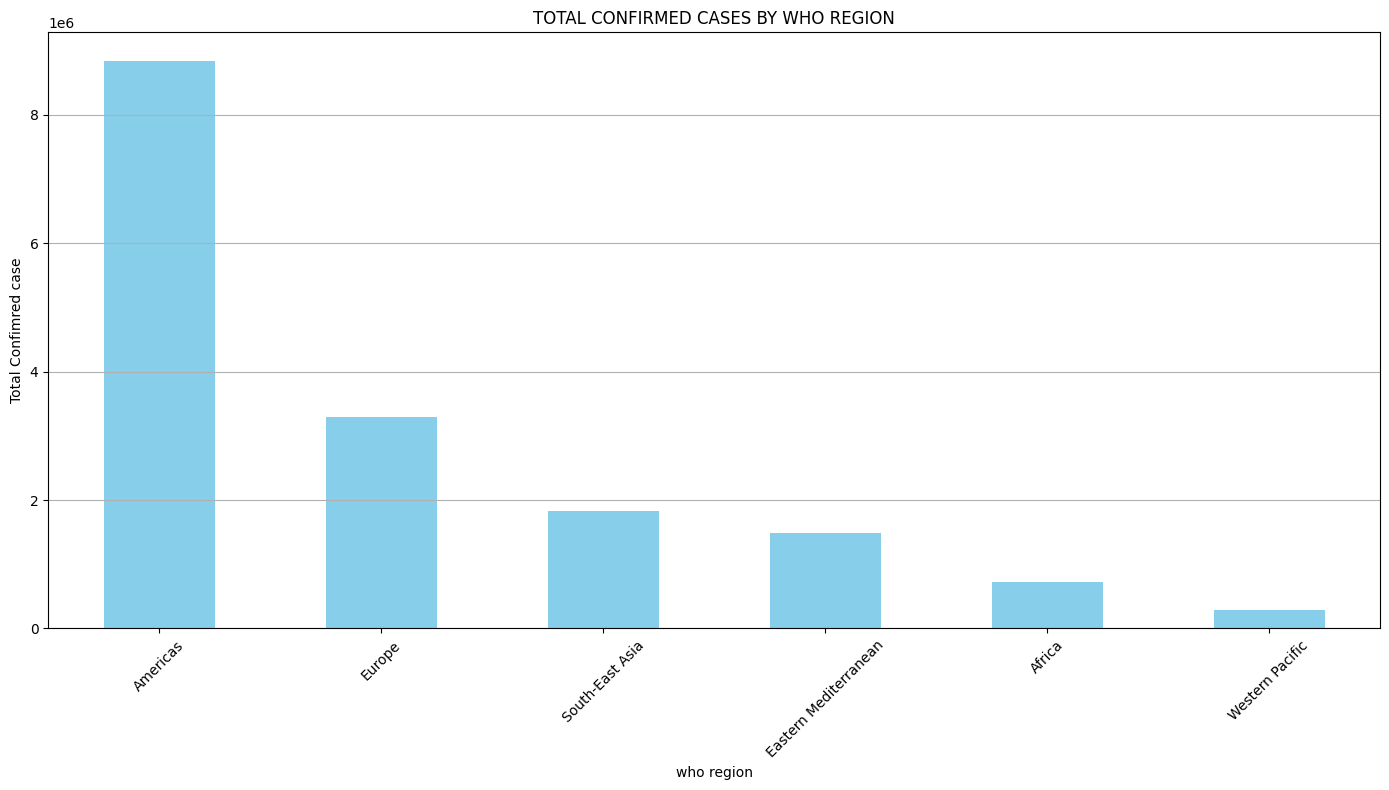

In [17]:
region_confirmed = df.groupby("WHO Region") ['Confirmed'].sum().sort_values(ascending=False)
plt.figure(figsize=(14,8))
region_confirmed.plot(kind='bar',color = 'skyblue')
plt.title('TOTAL CONFIRMED CASES BY WHO REGION')
plt.xlabel('who region')
plt.ylabel("Total Confimred case")
plt.xticks(rotation =45)
plt.grid(axis ='y')
plt.tight_layout()
plt.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_13464\3147320891.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Region',y= 'Active',data= top10_active,palette='muted6')


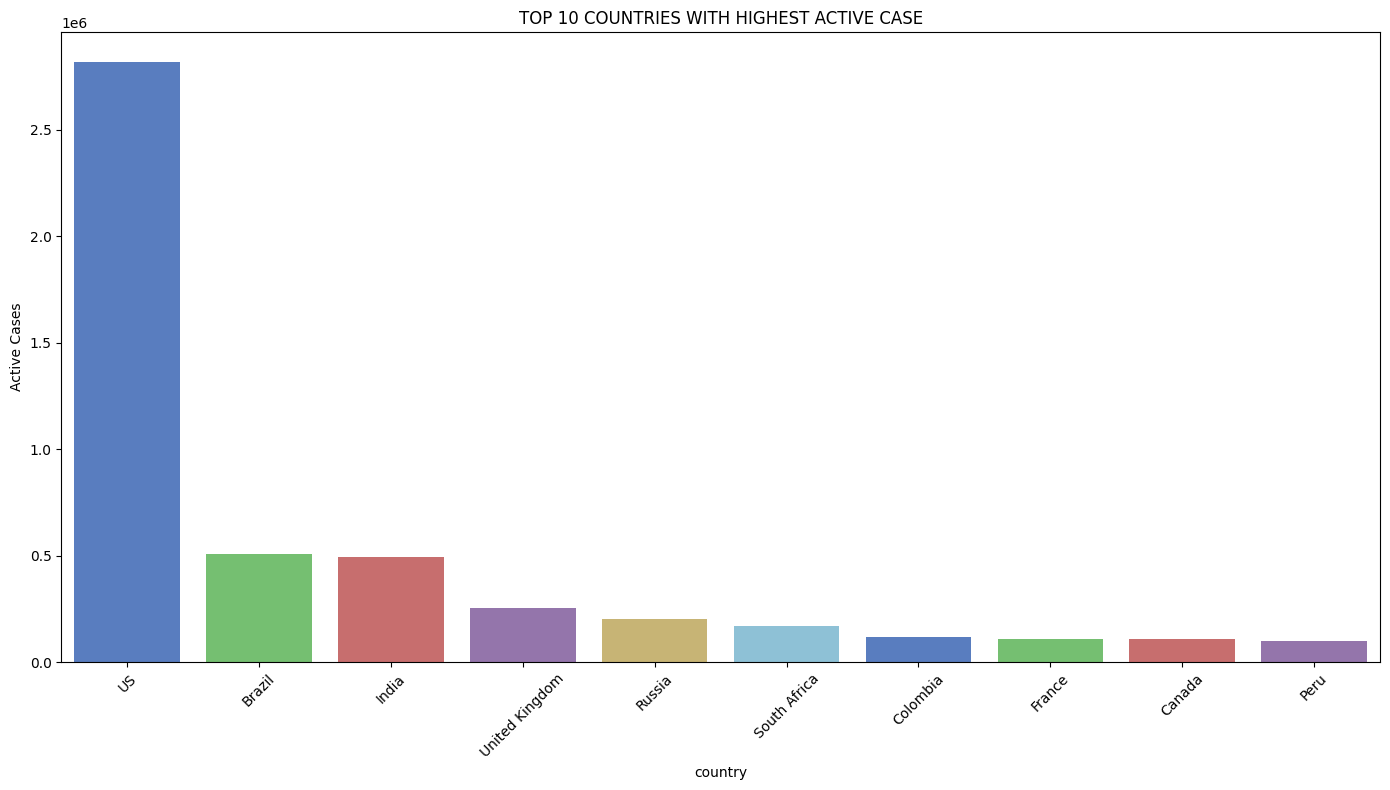

In [18]:
top10_active = df.sort_values(by='Active',ascending=False).head(10)

plt.figure(figsize=(14,8))
sns.barplot(x='Country/Region',y= 'Active',data= top10_active,palette='muted6')
plt.title('TOP 10 COUNTRIES WITH HIGHEST ACTIVE CASE')
plt.xlabel('country')
plt.ylabel("Active Cases")
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()


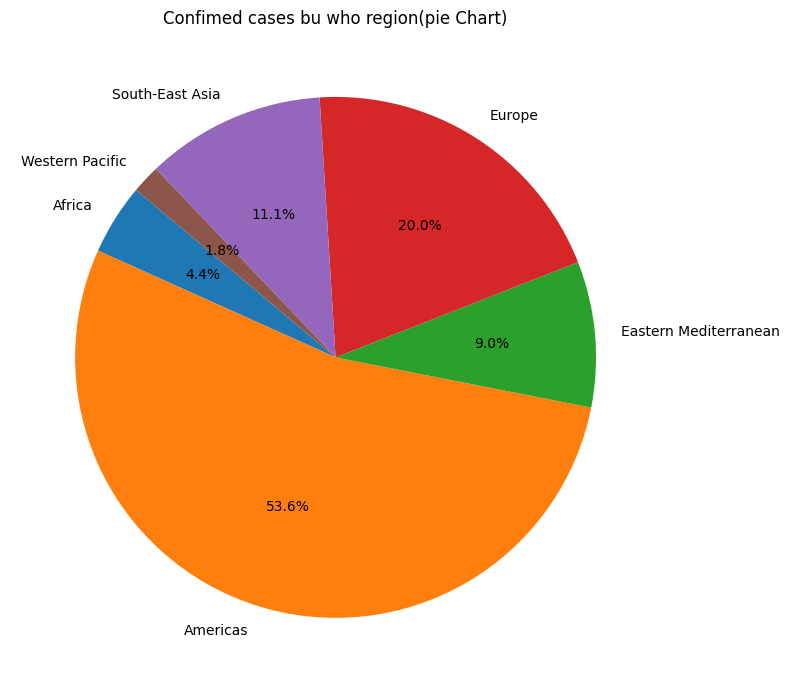

In [19]:
region_cases =df.groupby('WHO Region')['Confirmed'].sum()

plt.figure(figsize=(8,8))
plt.pie(region_cases,labels=region_cases.index,autopct='%1.1f%%',startangle=140)
plt.title('Confimed cases bu who region(pie Chart)')
plt.tight_layout()
plt.show()

In [20]:
df = pd.read_csv("Day 68 country.csv")
df.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


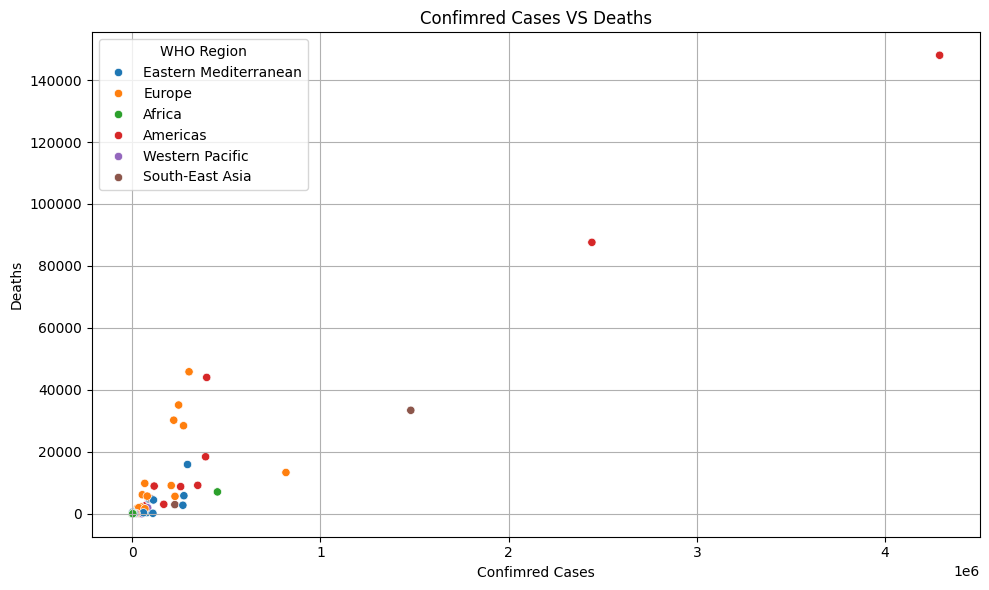

In [21]:

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Confirmed',y='Deaths',hue = 'WHO Region',data= df)
plt.title('Confimred Cases VS Deaths')
plt.xlabel('Confimred Cases')
plt.ylabel("Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()

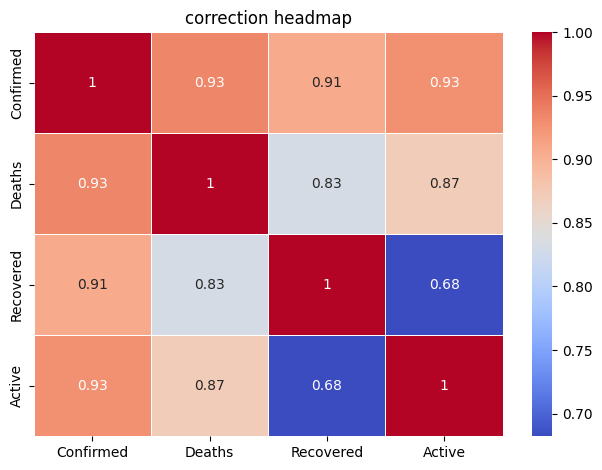

In [22]:
correlation = df[['Confirmed','Deaths','Recovered','Active']].corr()

plt.Figure(figsize=(8,6))
sns.heatmap(correlation , annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('correction headmap')
plt.tight_layout()
plt.show()


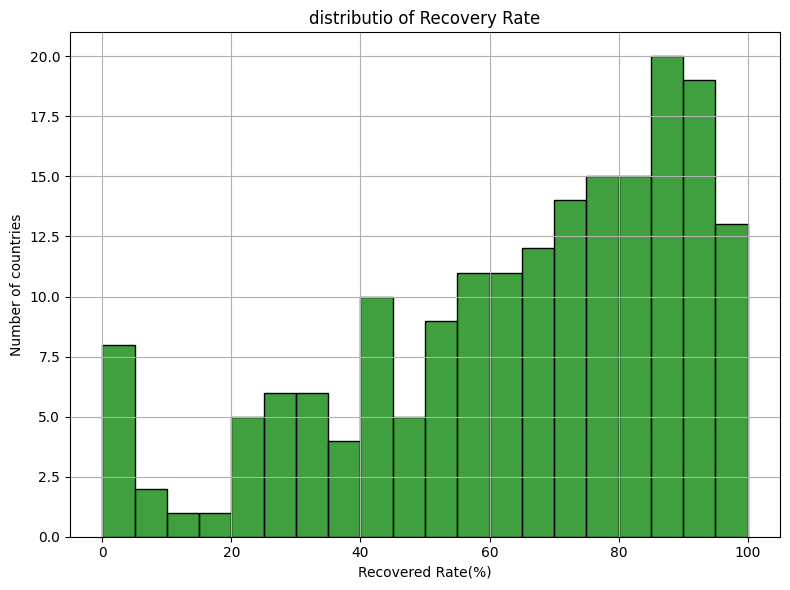

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(df['Recovery Rate'],bins = 20,color = 'green')
plt.title('distributio of Recovery Rate')
plt.xlabel('Recovered Rate(%)')
plt.ylabel('Number of countries')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
df['Recovery Rate'] = (df['Recovered']/df['Confirmed'])*100
df['Recovery Rate'].replace([float("inf"),-float("inf")],0,inplace=True)
df['Recovery Rate'].fillna(0,inplace=True)

highest_recovery_rate = df.loc[df['Recovery Rate'].idxmax(),'Country/Region']
print("COuntry With highest recovery Rate: ",highest_recovery_rate)

COuntry With highest recovery Rate:  Dominica


C:\Users\kumar\AppData\Local\Temp\ipykernel_13464\3164913125.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Recovery Rate'].replace([float("inf"),-float("inf")],0,inplace=True)
C:\Users\kumar\AppData\Local\Temp\ipykernel_13464\3164913125.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [26]:
gobal_recovery_rate


np.float64(57.450293483474546)

In [27]:
print(df.columns.tolist())

['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region', 'Recovery Rate']


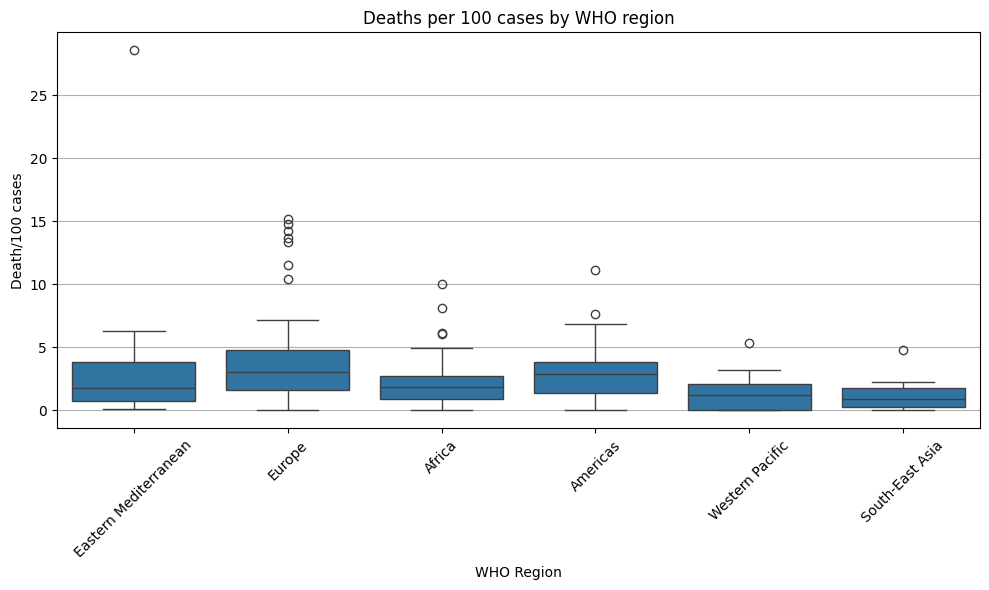

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x ='WHO Region',y= 'Deaths / 100 Cases',data=df)
plt.title("Deaths per 100 cases by WHO region")
plt.xlabel('WHO Region')
plt.ylabel('Death/100 cases')
plt.xticks(rotation =45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [29]:
if 'Confirmed Last Week' in df.columns and '1 Week Change' in df.columns:
    plt.figure(figsize=(8,8))
    sns.scatterplot(data=df, x='Confirmed Last Week', y='1 Week Change', hue='WHO region')
    plt.title('Weekly COVID Case Change vs Last Week')
    plt.xlabel('Confirmed Last Week')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Requested columns not found.")


Requested columns not found.


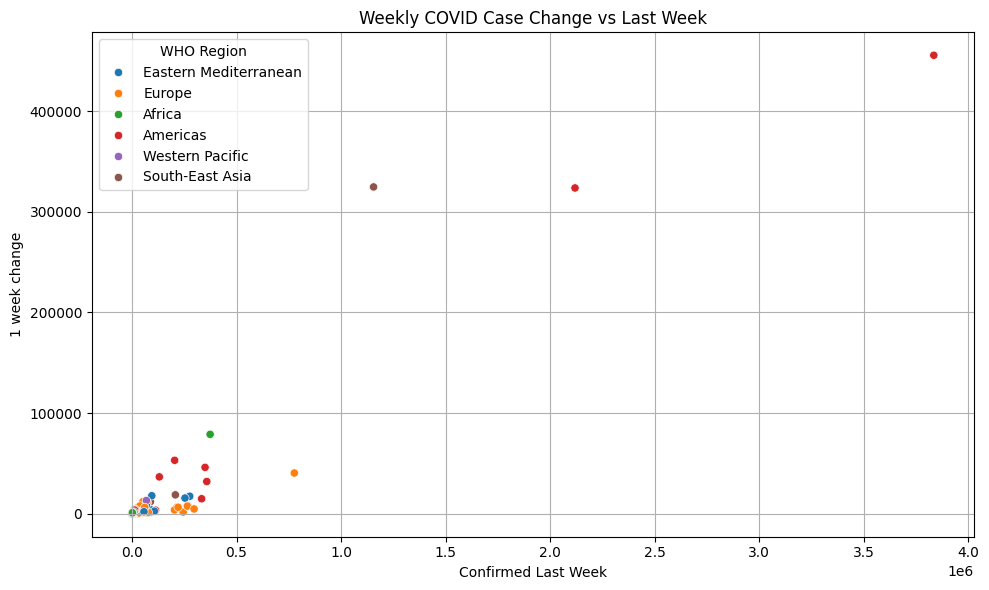

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Confirmed last week', y='1 week change', hue='WHO Region')
plt.title('Weekly COVID Case Change vs Last Week')
plt.xlabel('Confirmed Last Week')
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
print(df.columns.tolist())


['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region', 'Recovery Rate']


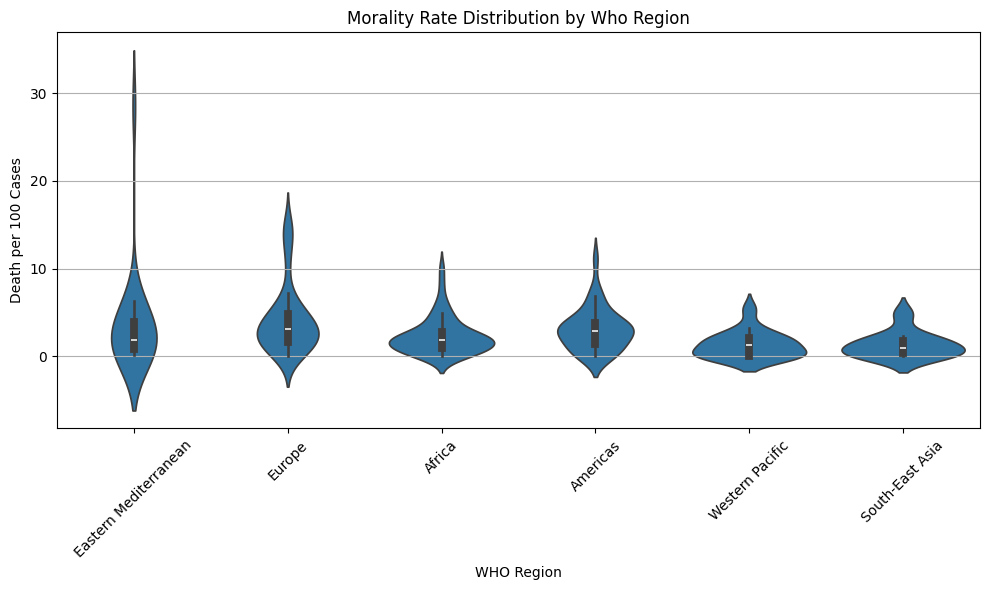

In [32]:
plt.figure(figsize=(10,6))
sns.violinplot(data= df, x='WHO Region',y='Deaths / 100 Cases')
plt.title('Morality Rate Distribution by Who Region')
plt.xlabel('WHO Region')
plt.ylabel('Death per 100 Cases')
plt.xticks(rotation = 45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [33]:
import dash
print("dash is installed correctly")

dash is installed correctly


In [34]:
pip install dash


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\kumar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [35]:
print(df.columns.tolist())

['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region', 'Recovery Rate']


In [38]:
chart1 =px.bar(df.groupby('WHO Region')['Confirmed'].sum().reset_index(),
               x ='WHO Region',y='Confirmed',title='total_Confirmed Case by WHO Region')

chart2 =px.bar(df.sort_values('Active',ascending=False).head(10),
               x='Country/Region', y='Active',title='Top 10 Countries with Active Cases')

chart3 = px.pie(df,names='WHO Region',values='Confirmed',title='Confirmed Cases Distribution by  Region')

chart4 = px.scatter(df, x='Confirmed',y='Deaths',color='WHO Region',
                    title='Confirmed Cases VS Deaths ')

chart5 = px.histogram(df, x='Recovery Rate', nbins=30,
                      title='recovery rate distribution across Countries')

chart6 = px.box(df, x='WHO Region', y= 'mortality Rate',title='Moretality Rate by Region')

correlation = df[['Confirmed','Deaths','Recovered','Active']].corr()
chart7 = go.Figure(data=go.Heatmap(z=correlation.values,
                                   x=correlation.columns,
                                   y=correlation.columns,
                                   colorscale= 'viridis'))
chart7.update_layout(title ='Correlation Heatmap of key matrics')

chart8 = px.box(df,x='WHO Region',y='Deaths / 100 Cases',title='Deaths per 100 Cases by Region')

if 'Confirmed last week ' in df.columns and '1 week change' in df.columns:
    chart9 = px.scatter(df,x='Confirmed last week', y='1 week change',
                        color='WHO Region',title='weekly change in corfirmed cases')
else:
    chart9 = go.Figure()
    chart9.update_layout(title = 'weekly change data not avaliable')

chart10 = px.violin(df,x='WHO Region',y='mortality Rate', box=True,
                    title='Mortality rate violin rate violin plot by region')

In [39]:
df['mortality Rate'] = (df['Deaths']/df['Confirmed'])*100
df['mortality Rate'].replace([float("inf"),-float("inf")],0,inplace=True)
df['mortality Rate'].fillna(0,inplace=True)

highest_mortality_rate = df.loc[df['mortality Rate'].idxmax(),'Country/Region']
print("COuntry With highest mortality Rate: ",highest_mortality_rate)

COuntry With highest mortality Rate:  Yemen


C:\Users\kumar\AppData\Local\Temp\ipykernel_13464\2045509928.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\kumar\AppData\Local\Temp\ipykernel_13464\2045509928.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [40]:
from dash import Dash, html, dcc

app = Dash(__name__)

app.layout = html.Div([
    html.H1('COVID-19 DATA DASHBOARD', style={'textAlign': 'center','color':'Blue'}),

    dcc.Graph(figure=chart1),
    dcc.Graph(figure=chart2),
    dcc.Graph(figure=chart3),
    dcc.Graph(figure=chart4),
    dcc.Graph(figure=chart5),
    dcc.Graph(figure=chart6),
    dcc.Graph(figure=chart7),
    dcc.Graph(figure=chart8),
    dcc.Graph(figure=chart9),
    dcc.Graph(figure=chart10),

    html.P('Built by Data Coaching',
           style={'textAlign': 'center', 'marginTop': '20px'})
])


In [41]:
if __name__ == '__main__':
    app.run(debug=True)